<a href="https://colab.research.google.com/github/Saketkr06/PRML/blob/LInear-Regression/Linear_Regression_Bayesian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.stats import multivariate_normal

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
np.set_printoptions(precision=4)

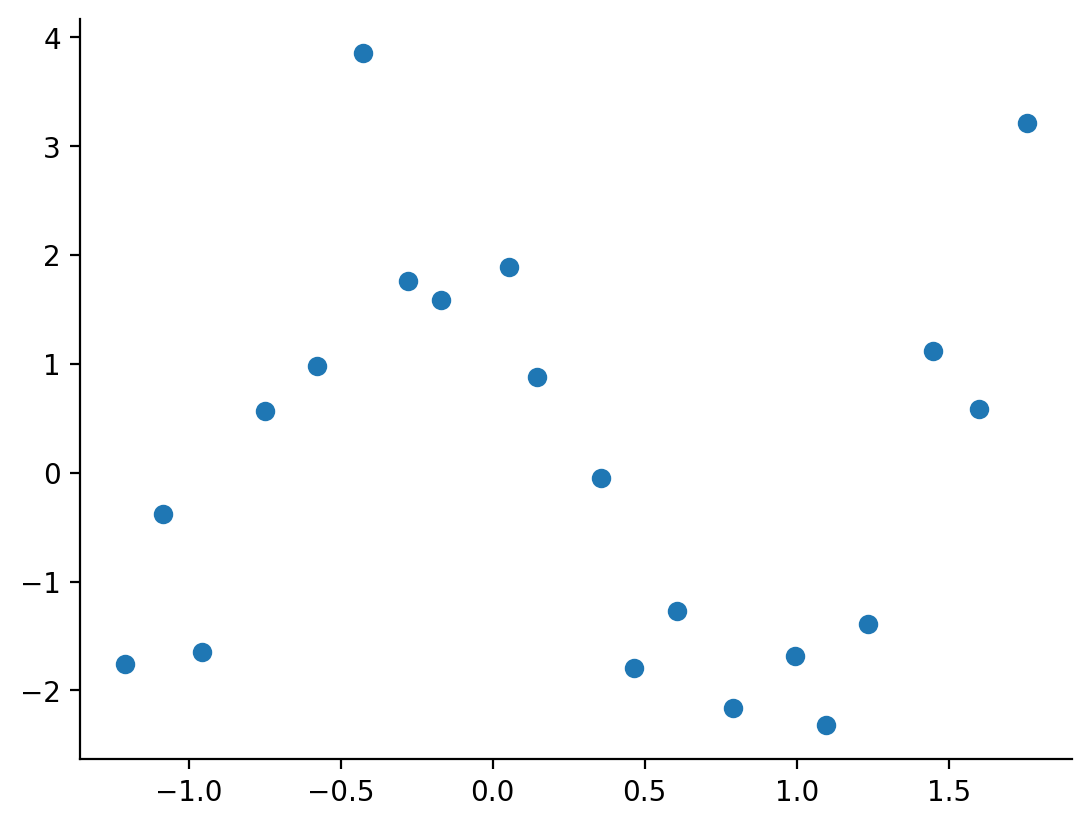

In [4]:
np.random.seed(314)

n_obs=20
sigma=0.8
x=np.linspace(-1.3,1.7,n_obs)+np.random.rand(n_obs)*0.1
y=1-3*x-2*x**2+2.5*x**3+np.random.randn(n_obs)*sigma

plt.scatter(x,y);

In [5]:
X=np.stack((np.ones_like(x),x,x**2,x**3),axis=1)
X

array([[ 1.0000e+00, -1.2083e+00,  1.4600e+00, -1.7642e+00],
       [ 1.0000e+00, -1.0833e+00,  1.1734e+00, -1.2711e+00],
       [ 1.0000e+00, -9.5771e-01,  9.1720e-01, -8.7841e-01],
       [ 1.0000e+00, -7.4800e-01,  5.5950e-01, -4.1850e-01],
       [ 1.0000e+00, -5.7662e-01,  3.3249e-01, -1.9172e-01],
       [ 1.0000e+00, -4.2779e-01,  1.8300e-01, -7.8288e-02],
       [ 1.0000e+00, -2.7984e-01,  7.8308e-02, -2.1914e-02],
       [ 1.0000e+00, -1.6869e-01,  2.8456e-02, -4.8002e-03],
       [ 1.0000e+00,  5.4334e-02,  2.9522e-03,  1.6041e-04],
       [ 1.0000e+00,  1.4713e-01,  2.1647e-02,  3.1848e-03],
       [ 1.0000e+00,  3.5558e-01,  1.2644e-01,  4.4960e-02],
       [ 1.0000e+00,  4.6300e-01,  2.1436e-01,  9.9250e-02],
       [ 1.0000e+00,  6.0697e-01,  3.6841e-01,  2.2361e-01],
       [ 1.0000e+00,  7.9123e-01,  6.2605e-01,  4.9535e-01],
       [ 1.0000e+00,  9.9453e-01,  9.8910e-01,  9.8369e-01],
       [ 1.0000e+00,  1.0962e+00,  1.2017e+00,  1.3174e+00],
       [ 1.0000e+00,  1.

In [7]:
alpha=1.2
m=4
cov0=np.eye(m)*alpha
mu0=np.zeros((m,1))

In [8]:
SN_inv=inv(cov0) +X.T@X/sigma**2
SN=inv(SN_inv)

mN=SN@(inv(cov0)@mu0 +X.T @ y[:,None]/sigma**2)

mN

array([[ 0.794 ],
       [-2.7186],
       [-1.6215],
       [ 2.1555]])

In [10]:
n_test=100
xtest=np.linspace(-1.3,1.8,n_test)
Xtest=np.stack((np.ones_like(xtest),xtest,xtest**2,xtest**3))

In [11]:
n_samples=20
#we create an instance of our random vector
w=multivariate_normal(mean=mN.ravel(),cov=SN)
w_sample=w.rvs(n_samples)

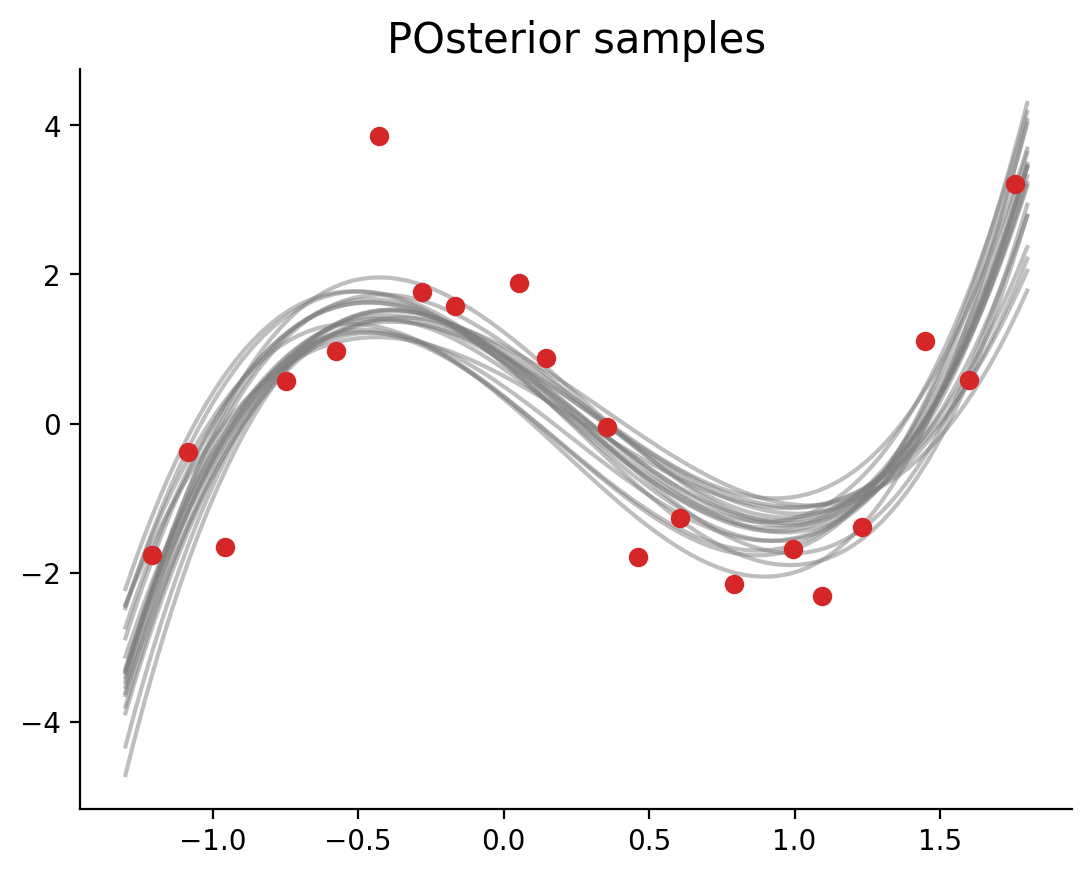

In [12]:
y_test_sample=np.einsum('km,mn->nk',w_sample,Xtest)
plt.plot(xtest,y_test_sample,c='tab:gray',alpha=0.5,zorder=1)
plt.scatter(x,y,c='tab:red',zorder=2)
plt.title('POsterior samples',fontsize=15);